This notebook is similar to dataset_generator but is used to visualize one instance for data quality.

In contrast, dataset_generator goes through all pickle files and constructs a dataset for k-fold cross validation.

In [1]:
import glob
import numpy as np
import scipy.io as sio
import pickle
import matplotlib.pyplot as plt
import pdb
from pkl_reader import *

### TODO
* [x] interpolating heading (see interpolate_heading). Added a `np.unwrap()` to prevent possible wrapping around issue
* [x] switch to ego frame (position/orientation are all zero at t = 0). Added a switch in `get_ego_trajectory_prediction_snippets()` function.
* [ ] optional: complete outlier removal in bag_processing (see "Additional Notes").  Need to check time indices.

### Data Loading

In [2]:
save_ext = 'pkl'
files_to_process = glob.glob('../examples/bags/*.%s' % save_ext)

print('Found %d files to read: %s' % (len(files_to_process), files_to_process))

Found 59 files to read: ['../examples/bags/parking_p2_t2_e3_2019-11-04-16-39-13.pkl', '../examples/bags/parking_p2_t1_e9_2019-11-04-16-35-54.pkl', '../examples/bags/parking_p3_t1_e1_2019-11-26-15-45-22.pkl', '../examples/bags/parking_p2_t1_e7_2019-11-04-16-35-13.pkl', '../examples/bags/parking_p2_t1_e0_2019-11-04-16-32-53.pkl', '../examples/bags/parking_p3_t2_e0_2019-11-26-16-11-31.pkl', '../examples/bags/parking_p3_t2_e9_2019-11-26-16-14-52.pkl', '../examples/bags/parking_p2_t2_e1_2019-11-04-16-37-56.pkl', '../examples/bags/parking_p3_t2_e6_2019-11-26-16-13-37.pkl', '../examples/bags/parking_p1_t2_e1_2019-11-04-14-40-57.pkl', '../examples/bags/parking_p3_t2_e4_2019-11-26-16-12-49.pkl', '../examples/bags/parking_p1_t2_e8_2019-11-04-14-44-50.pkl', '../examples/bags/parking_p2_t2_e0_2019-11-04-16-36-50.pkl', '../examples/bags/parking_p3_t1_e6_2019-11-26-15-47-03.pkl', '../examples/bags/parking_p1_t1_e8_2019-11-04-14-37-56.pkl', '../examples/bags/parking_p2_t1_e1_2019-11-04-16-33-19.pkl',

In [3]:
file_num = 2 # TODO: starting with the first matfile for now
if save_ext == 'mat':
    res_dict = sio.loadmat(files_to_process[file_num], matlab_compatible=True) 
    
elif save_ext == 'pkl':
    res_dict = pickle.load(open(files_to_process[file_num],'rb'))
else:
    raise NotImplemented("Invalid extension.")

In [4]:
goals = extract_goals(res_dict)
ego_trajectory, start_ind, switch_ind, end_ind, goal_ind = extract_full_trajectory(res_dict, goals)

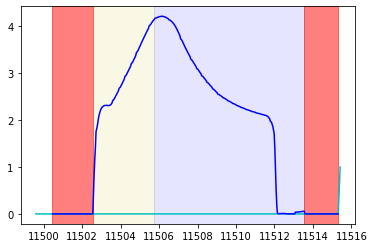

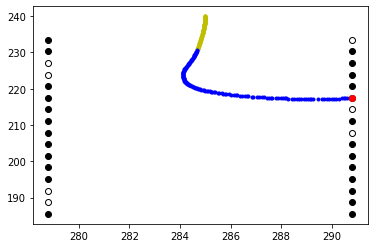

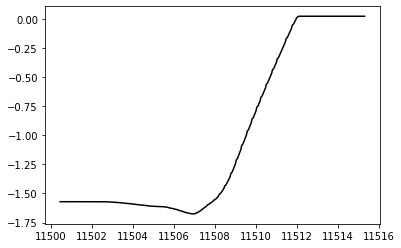

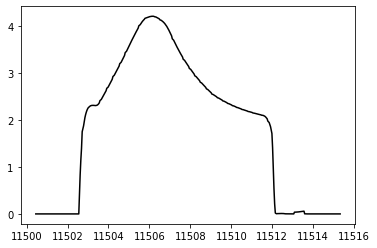

In [5]:
ego_control_dict =  extract_control_info(res_dict)

plt.figure()
plt.plot(ego_control_dict['t'], ego_control_dict['reverse'], 'c')
plt.plot(ego_trajectory[:,0], ego_trajectory[:,4], 'b')
plt.axvspan(ego_trajectory[0,0], ego_trajectory[start_ind,0], alpha=0.5, color='r')
plt.axvspan(ego_trajectory[start_ind,0], ego_trajectory[switch_ind,0], alpha=0.1, color='y')
plt.axvspan(ego_trajectory[switch_ind,0], ego_trajectory[end_ind,0], alpha=0.1, color='b')
plt.axvspan(ego_trajectory[end_ind,0], ego_trajectory[-1,0], alpha=0.5, color='r')

plt.figure()
plt.plot(ego_trajectory[start_ind:switch_ind,1], \
         ego_trajectory[start_ind:switch_ind,2], \
         'y.')
plt.plot(ego_trajectory[switch_ind:end_ind,1], \
         ego_trajectory[switch_ind:end_ind,2], \
         'b.')
for goal in goals:
    if goal[2] > 0:
        plt.plot(goal[0], goal[1], 'ko', fillstyle='none')
    else:
        plt.plot(goal[0], goal[1], 'ko')
        
plt.plot(goals[goal_ind,0], goals[goal_ind,1], 'ro')

plt.figure()
plt.plot(ego_trajectory[:,0], ego_trajectory[:,3], 'k')

plt.figure()
plt.plot(ego_trajectory[:,0], ego_trajectory[:,4], 'k')

# print(ego_trajectory[:,3])

Feature Example
 [[ 7.446e-03  8.198e-01  3.910e-03  1.397e+00 -7.136e-03]
 [ 6.165e-03  6.484e-01  3.073e-03  1.875e+00 -9.058e-03]
 [ 4.456e-03  4.459e-01  2.108e-03  2.115e+00 -9.987e-03]
 [ 2.411e-03  2.271e-01  1.078e-03  2.241e+00 -1.047e-02]
 [ 0.000e+00  0.000e+00  0.000e+00  2.290e+00 -1.098e-02]]
Label Example
 [[-2.716e-03 -2.295e-01 -1.161e-03  2.311e+00 -1.250e-02 -1.000e+00]
 [-6.104e-03 -4.601e-01 -2.560e-03  2.311e+00 -1.492e-02 -1.000e+00]
 [-1.016e-02 -6.906e-01 -4.180e-03  2.308e+00 -1.671e-02 -1.000e+00]
 [-1.474e-02 -9.221e-01 -5.884e-03  2.328e+00 -1.707e-02 -1.000e+00]
 [-2.158e-02 -1.238e+00 -8.216e-03  2.413e+00 -1.776e-02 -1.000e+00]
 [-2.542e-02 -1.401e+00 -9.418e-03  2.466e+00 -1.819e-02 -1.000e+00]
 [-3.177e-02 -1.653e+00 -1.128e-02  2.546e+00 -1.886e-02 -1.000e+00]
 [-3.879e-02 -1.912e+00 -1.320e-02  2.624e+00 -1.940e-02 -1.000e+00]
 [-4.651e-02 -2.179e+00 -1.517e-02  2.702e+00 -1.994e-02 -1.000e+00]
 [-5.498e-02 -2.454e+00 -1.718e-02  2.784e+00 -2.026e-02

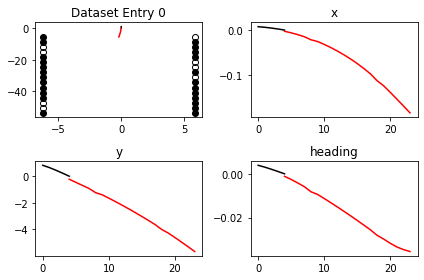

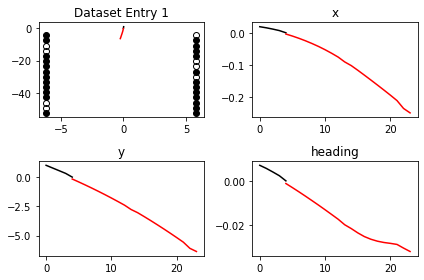

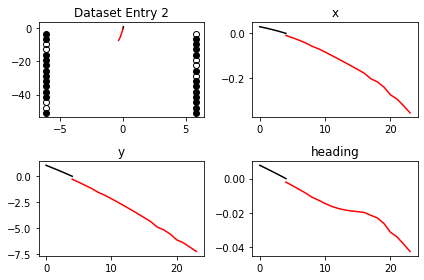

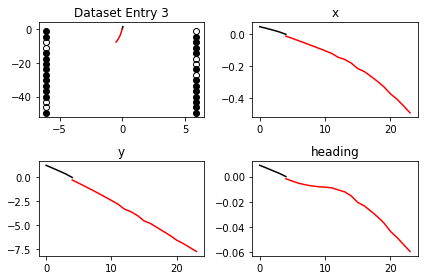

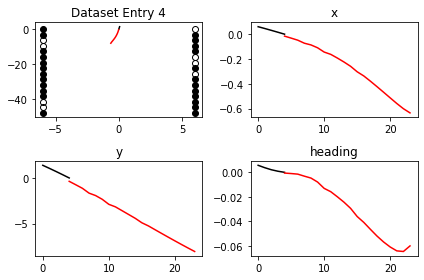

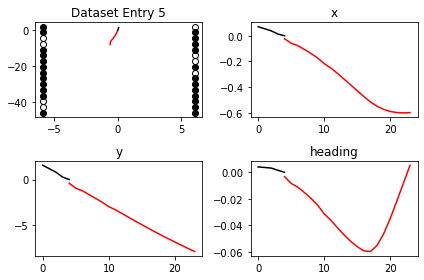

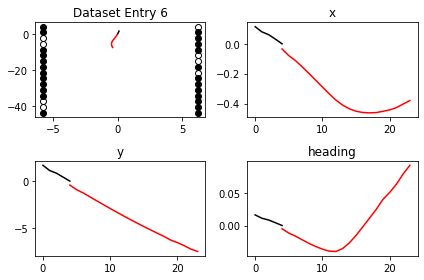

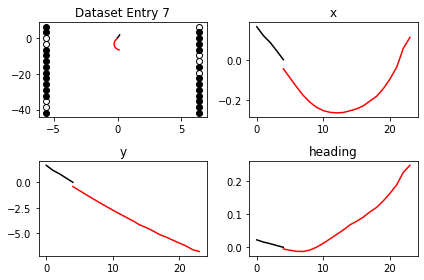

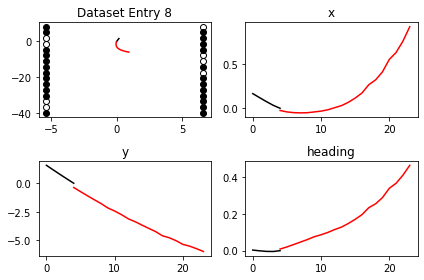

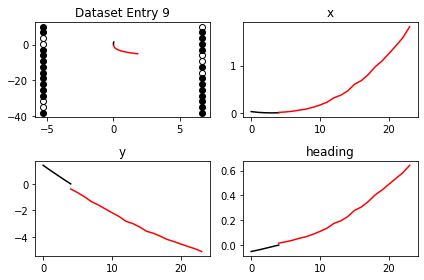

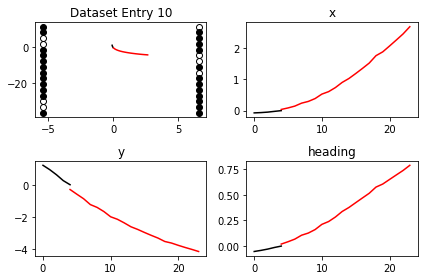

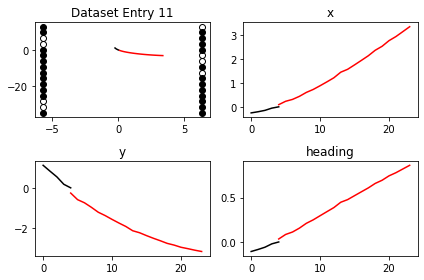

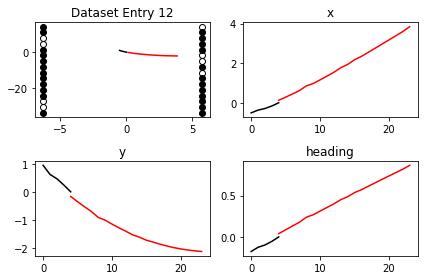

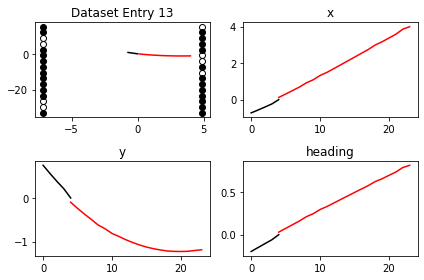

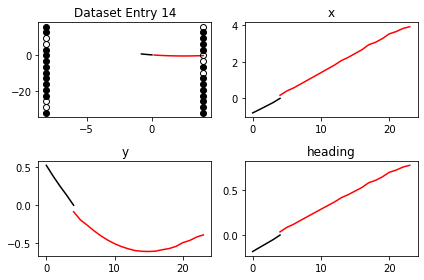

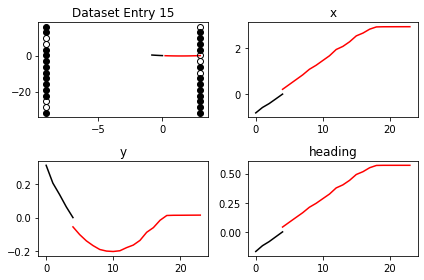

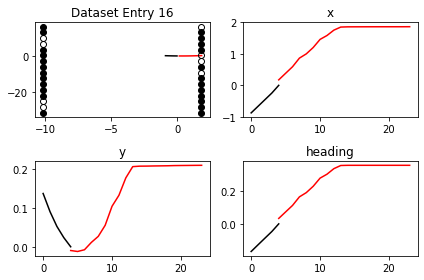

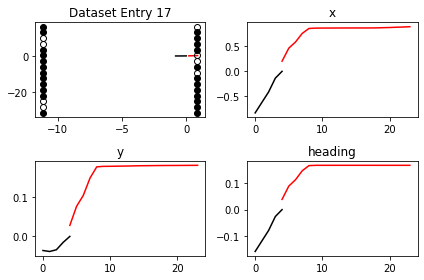

In [6]:
ego_trans = True
features, labels, goal_snpts = get_ego_trajectory_prediction_snippets(ego_trajectory, start_ind, switch_ind, end_ind, goal_ind, \
                                                          goals, ego_frame=ego_trans)

# print(goal_snpts)    

np.set_printoptions(precision=3)
print('Feature Example\n', features[0])
print('Label Example\n', labels[0])

Nhist = 5
Npred = 20

for i in range(0, len(features)):
    plt.figure()
    plt.subplot(221)
    plt.plot(features[i][:,0], features[i][:,1], 'k')
    plt.plot(labels[i][:,0], labels[i][:,1], 'r')
    
    for goal in goal_snpts[i]:
        if goal[2] > 0:
            plt.plot(goal[0], goal[1], 'ko', fillstyle='none')
        else:
            plt.plot(goal[0], goal[1], 'ko')
    plt.title('Dataset Entry %d' % i)
    
    plt.subplot(222)
    
    plt.plot(range(Nhist), features[i][:,0], 'k.')
    plt.plot(range(Nhist, Nhist+Npred), labels[i][:,0], 'r.')
    plt.title('x')
    
    plt.subplot(223)
    plt.plot(range(Nhist), features[i][:,1], 'k.')
    plt.plot(range(Nhist, Nhist+Npred), labels[i][:,1], 'r.')
    plt.title('y')
    
    plt.subplot(224)
    plt.plot(range(Nhist), features[i][:,2], 'k.')
    plt.plot(range(Nhist, Nhist+Npred), labels[i][:,2], 'r.')
    plt.title('heading')
    
    plt.tight_layout()